In [193]:
# First, import the standard libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob,pathlib

# for some monitors, this makes the figures crisp
%config InlineBackend.figure_format='retina'

## CCLE Data
We have prepared some simplified dataframes based on the [Cancer Cell Line Encyclopedia](https://sites.broadinstitute.org/ccle/) (CCLE) database from the Broad Institute. They are broken into a generic cell line metadata file, and a RNAseq file with RPKM data.  
<img src="https://sites.broadinstitute.org/files/files/ccle/files/ccle_4.jpg" alt="CCLE" align="left" width="500" height="300">



### Read in data files with Pandas 
Have a look at the files we have prepared for you. The ```glob``` library in Python provides a simple way to search for files and directories that match a specified pattern. Use an asterisk * to invoke a wild card

In [125]:
glob.glob('data/*')

['data/CCLE_rpkm_metadata_forcourse.csv.gz', 'data/CCLE_rpkm_forcourse.csv.gz']

In [126]:
# read in the metadata file
meta = pd.read_csv('data/CCLE_rpkm_metadata_forcourse.csv.gz', index_col=0)
meta[:3]

,depMapID,Pathology,Site_Primary,Site_Subtype1,Histology,Gender,Age,Race,inferred_ethnicity,Disease,Doubling.Time.Calculated.hrs,type,type_refined,PATHOLOGIST_ANNOTATION,mutRate
Cell_Line,,,,,,,,,,,,,,,
2313287_STOMACH,ACH-000948,primary,stomach,NS,carcinoma,male,72.0,NaN,Caucasian,NaN,97.6,stomach,stomach,Gastric:Carcinoma,521.355253
42MGBA_CENTRAL_NERVOUS_SYSTEM,ACH-000323,primary,central_nervous_system,brain,glioma,male,63.0,NaN,Caucasian,Brain Cancer,82.6,glioma,glioma,CNS:Glioma_HighGrade,107.050880
59M_OVARY,ACH-000520,metastasis,ovary,NS,carcinoma,female,NaN,NaN,Caucasian,ovarian_carcinoma,NaN,ovary,ovary,Ovary:Carcinoma,110.612331


In [128]:
# Get a quick summary of what the columns of the dataframe contain
meta.info()


<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 2313287_STOMACH to ZR7530_BREAST
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   depMapID                      804 non-null    object 
 1   Pathology                     775 non-null    object 
 2   Site_Primary                  804 non-null    object 
 3   Site_Subtype1                 804 non-null    object 
 4   Histology                     804 non-null    object 
 5   Gender                        713 non-null    object 
 6   Age                           619 non-null    float64
 7   Race                          443 non-null    object 
 8   inferred_ethnicity            801 non-null    object 
 9   Disease                       266 non-null    object 
 10  Doubling.Time.Calculated.hrs  440 non-null    float64
 11  type                          802 non-null    object 
 12  type_refined                  804 non-null   

In [130]:
# Numerical columns can be summarized with the .describe() method
meta.describe()

,Age,Doubling.Time.Calculated.hrs,mutRate
count,619.000000,440.000000,785.000000
mean,50.320005,98.291641,200.419679
std,18.264266,87.461201,248.548016
min,0.250000,20.900000,53.870752
25%,41.000000,49.875000,104.775734
50%,54.000000,72.250000,136.470378
75%,64.000000,113.300000,181.189653
max,92.000000,979.000000,3119.618365



The ```pd.crosstab()``` function creates a frequency table (or contingency table) that summarizes the relationship between two or more categorical variables. It's particularly useful for analyzing count-based data across categories

In [199]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins: 'bool' = False, margins_name: 'Hashable' = 'All', dropna: 'bool' = True, normalize: "bool | Literal[0, 1, 'all', 'index', 'columns']" = False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors.
    
    By default, computes a frequency table of the factors unless an
    array of values and an aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequen

In [197]:
pd.crosstab(meta['Site_Primary'],meta['Race'])

Race,african,african_american,american_indian,asian,caucasian,east_indian,north_african
Site_Primary,,,,,,,
breast,0,9,0,3,35,1,0
central_nervous_system,0,1,0,7,12,0,0
endometrium,0,0,0,15,6,0,0
haematopoietic_and_lymphoid_tissue,2,3,0,21,32,0,1
kidney,0,0,0,7,5,0,0
large_intestine,0,0,1,13,25,0,0
lung,0,10,0,12,99,0,0
ovary,0,1,0,13,8,0,0
pancreas,0,0,0,13,18,0,0


### Read in gene expression data

In [201]:
rpkm = pd.read_csv('data/CCLE_rpkm_forcourse.csv.gz', index_col=0)
rpkm[:3]

,WASH7P,MTND1P23,MTND2P28,hsa-mir-6723,RP5-857K21.7,MTATP8P1,MTATP6P1,RP5-857K21.11,SAMD11,NOC2L,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-TE,MT-CYB
Cell_Line,,,,,,,,,,,,,,,,,,,,,
2313287_STOMACH,4.26104,0.839617,115.65700,24.8860,8.3378,13.06640,241.8750,6.39347,0.472467,47.5542,...,9810.56,10612.90,8955.51,1288.33,3914.86,8190.65,1909.74,1974.76,3.06213,3685.24
42MGBA_CENTRAL_NERVOUS_SYSTEM,3.99494,1.376160,4.86524,9.4919,17.7806,5.61414,15.6446,9.96201,11.776600,106.4350,...,6315.61,6579.52,3711.09,1188.07,2616.58,4004.12,1158.29,1622.68,2.55038,2215.69
59M_OVARY,2.56941,4.081810,70.18380,34.3897,26.3026,8.09055,575.6590,20.21690,3.678380,76.9264,...,7254.03,6886.41,7738.25,1501.63,3520.43,5364.07,1911.64,1900.10,37.64800,1975.03


Merge the data together with the ```.merge()``` method built into Pandas dataframes

In [45]:
data = meta.merge(rpkm, left_index=True, right_index=True, how='left')
data[:3]

,depMapID,Pathology,Site_Primary,Site_Subtype1,Histology,Gender,Age,Race,inferred_ethnicity,Disease,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-TE,MT-CYB
Cell_Line,,,,,,,,,,,,,,,,,,,,,
2313287_STOMACH,ACH-000948,primary,stomach,NS,carcinoma,male,72.0,NaN,Caucasian,NaN,...,9810.56,10612.90,8955.51,1288.33,3914.86,8190.65,1909.74,1974.76,3.06213,3685.24
42MGBA_CENTRAL_NERVOUS_SYSTEM,ACH-000323,primary,central_nervous_system,brain,glioma,male,63.0,NaN,Caucasian,Brain Cancer,...,6315.61,6579.52,3711.09,1188.07,2616.58,4004.12,1158.29,1622.68,2.55038,2215.69
59M_OVARY,ACH-000520,metastasis,ovary,NS,carcinoma,female,NaN,NaN,Caucasian,ovarian_carcinoma,...,7254.03,6886.41,7738.25,1501.63,3520.43,5364.07,1911.64,1900.10,37.64800,1975.03


In [29]:
meta['Doubling.Time.Calculated.hrs'].nsmallest(20)

Cell_Line
SW620_LARGE_INTESTINE                      20.9
NCIH82_LUNG                                21.6
CAL33_UPPER_AERODIGESTIVE_TRACT            24.8
BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    25.5
NCIH460_LUNG                               25.5
RKO_LARGE_INTESTINE                        25.6
CA46_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    25.7
ES2_OVARY                                  25.8
CAL51_BREAST                               26.8
UO31_KIDNEY                                27.8
IPC298_SKIN                                29.0
CAL27_UPPER_AERODIGESTIVE_TRACT            29.3
LOXIMVI_SKIN                               29.3
HS618T_FIBROBLAST                          30.0
MCAS_OVARY                                 30.0
A375_SKIN                                  30.8
NCIH1792_LUNG                              31.2
769P_KIDNEY                                31.5
GAMG_CENTRAL_NERVOUS_SYSTEM                33.0
HCC44_LUNG                                 33.0
Name: Doubling.Time.Calculated

<Axes: xlabel='Doubling.Time.Calculated.hrs', ylabel='MYC'>

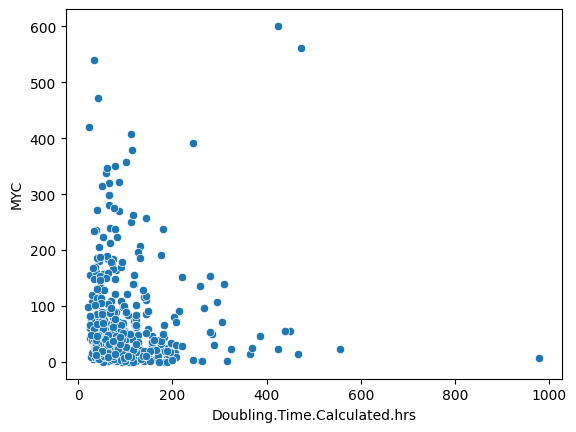

In [30]:
sns.scatterplot(data=data, x='Doubling.Time.Calculated.hrs', y='MYC')

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_30467/606267119.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=data, x='MYC', y='Site_Primary', palette='husl')


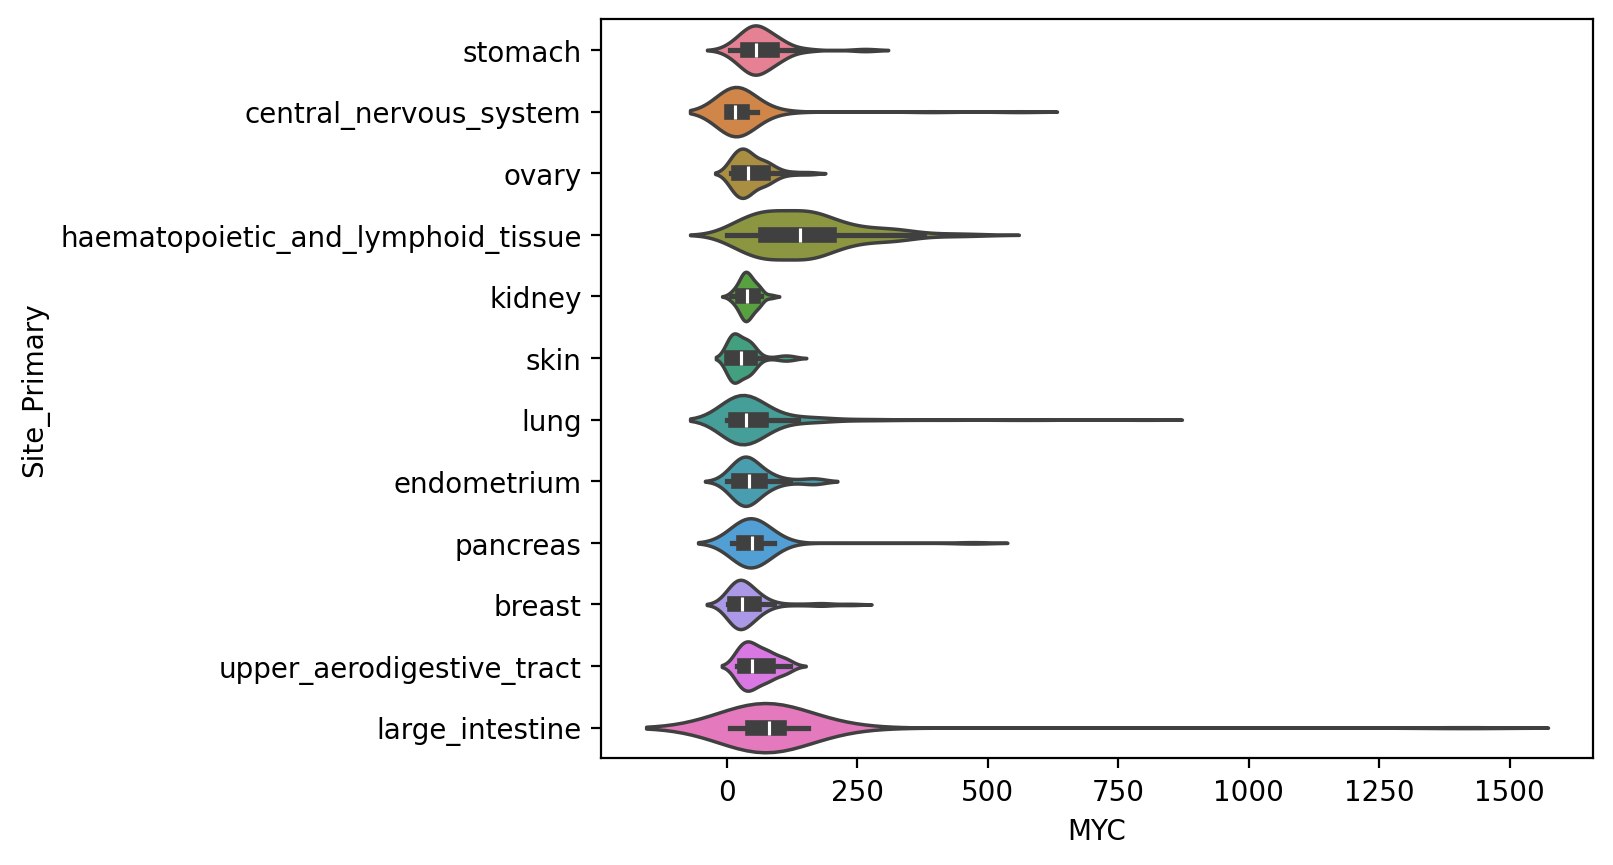

In [42]:
g = sns.violinplot(data=data, x='MYC', y='Site_Primary', palette='husl')

/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_30467/510771864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=data, x='Site_Primary', y='MYC', palette='husl')
/var/folders/nf/xtw56kd973bg5k4ptxf1480w0000gp/T/ipykernel_30467/510771864.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


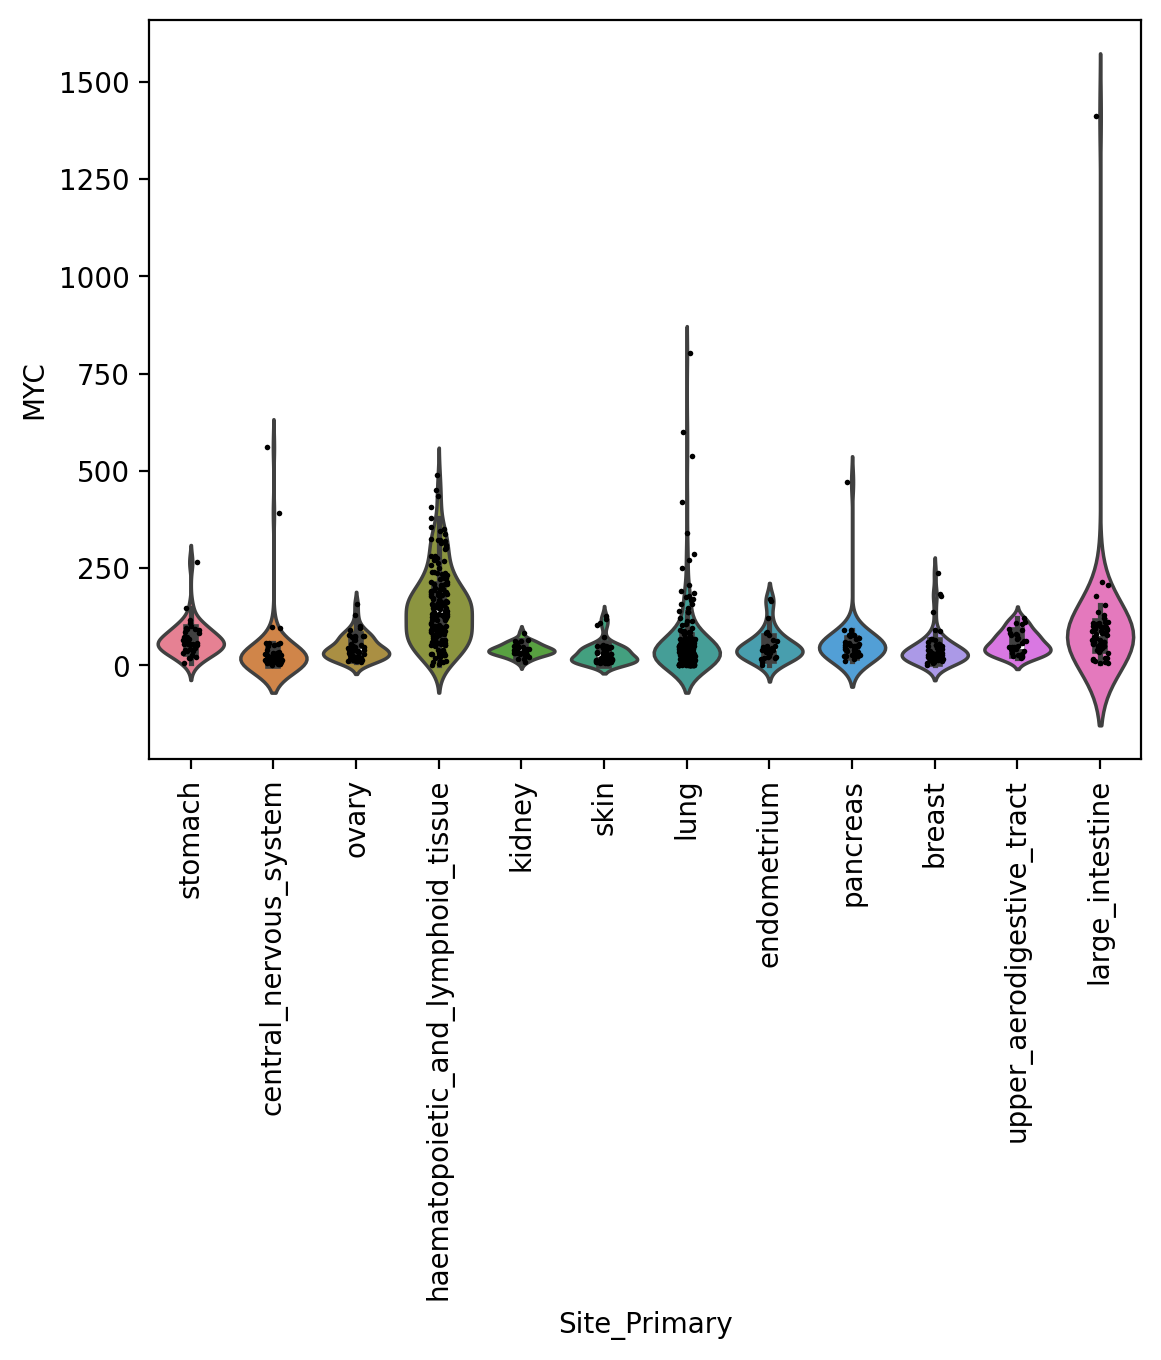

In [37]:
g = sns.violinplot(data=data, x='Site_Primary', y='MYC', palette='husl')
sns.stripplot(data=data, x='Site_Primary', y='MYC', color='black', s=2)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

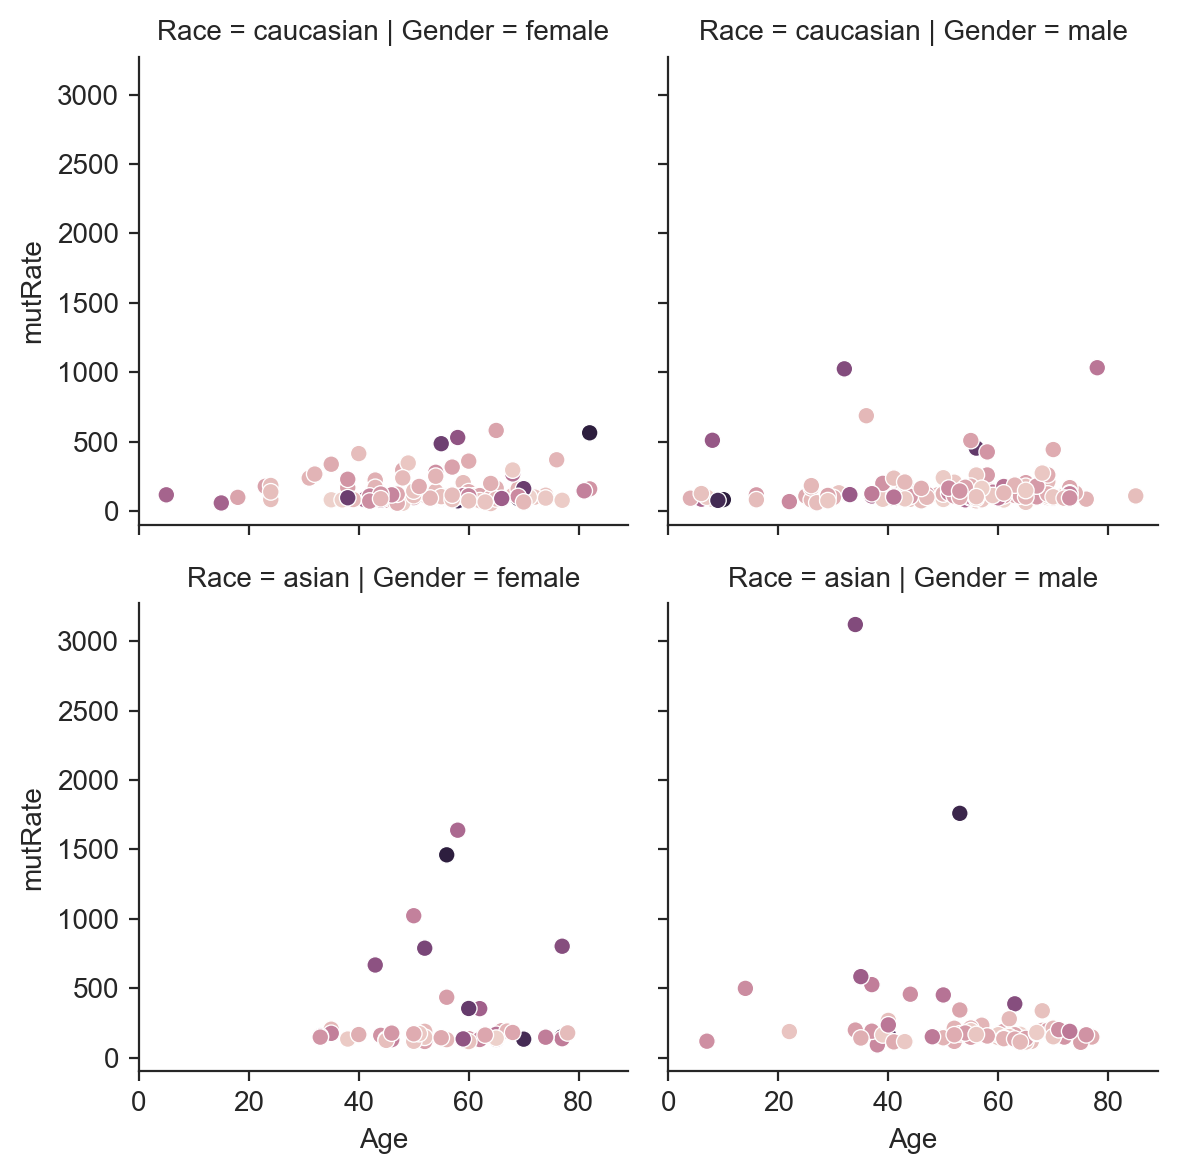

In [202]:
df = data[data['Race'].isin(['asian','caucasian'])]

g = sns.FacetGrid(df, col="Gender",  row="Race")
g.map(sns.scatterplot, "Age", "mutRate","ZBED3")
